In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("iris.csv")
df

,がく片長さ,がく片幅,花弁長さ,花弁幅,種類
0,0.22,0.63,0.08,0.04,Iris-setosa
1,0.17,0.42,0.35,0.04,Iris-setosa
2,0.11,0.50,0.13,0.04,Iris-setosa
3,0.08,0.46,0.26,0.04,Iris-setosa
4,0.19,0.67,0.44,0.04,Iris-setosa
...,...,...,...,...,...
145,0.67,0.42,0.54,0.92,Iris-virginica
146,0.56,0.21,0.69,0.46,Iris-virginica
147,0.61,0.42,NaN,0.79,Iris-virginica
148,0.53,0.58,0.63,0.92,Iris-virginica


In [5]:
len(df["種類"].unique())

3

In [6]:
df['種類'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: 種類, dtype: int64

In [9]:
df.isna().any(axis=0)

がく片長さ     True
がく片幅      True
花弁長さ      True
花弁幅       True
種類       False
dtype: bool

In [10]:
df2 = df.dropna(how = 'any', axis = 0)
df2.isna().any(axis=0)

がく片長さ    False
がく片幅     False
花弁長さ     False
花弁幅      False
種類       False
dtype: bool

In [12]:
df['花弁長さ'] = df['花弁長さ'].fillna(0)
df.tail(3)

,がく片長さ,がく片幅,花弁長さ,花弁幅,種類
147,0.61,0.42,0.00,0.79,Iris-virginica
148,0.53,0.58,0.63,0.92,Iris-virginica
149,0.44,0.42,0.41,0.71,Iris-virginica


In [13]:
df.isna().sum()

がく片長さ    2
がく片幅     1
花弁長さ     0
花弁幅      2
種類       0
dtype: int64

In [14]:
df.mean()

がく片長さ    0.420878
がく片幅     0.440403
花弁長さ     0.480267
花弁幅      0.447432
dtype: float64

In [15]:
df = pd.read_csv("iris.csv")
df

,がく片長さ,がく片幅,花弁長さ,花弁幅,種類
0,0.22,0.63,0.08,0.04,Iris-setosa
1,0.17,0.42,0.35,0.04,Iris-setosa
2,0.11,0.50,0.13,0.04,Iris-setosa
3,0.08,0.46,0.26,0.04,Iris-setosa
4,0.19,0.67,0.44,0.04,Iris-setosa
...,...,...,...,...,...
145,0.67,0.42,0.54,0.92,Iris-virginica
146,0.56,0.21,0.69,0.46,Iris-virginica
147,0.61,0.42,NaN,0.79,Iris-virginica
148,0.53,0.58,0.63,0.92,Iris-virginica


In [16]:
mean = df.mean()

In [18]:
df2 = df.fillna(mean)
df2.isna().sum()

がく片長さ    0
がく片幅     0
花弁長さ     0
花弁幅      0
種類       0
dtype: int64

In [19]:
xcol = ['がく片長さ','がく片幅','花弁長さ','花弁幅']

x = df2[xcol]
t = df2['種類']

In [20]:
from sklearn import tree

model = tree.DecisionTreeClassifier(max_depth=2, random_state = 0)

In [21]:
model.fit(x, t)
model.score(x,t)

0.94

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,t, test_size = 0.3, random_state = 0)


In [24]:
list_ = [x_train, x_test]
for i in list_:
    print(f"{i.shape}")

(105, 4)
(45, 4)


In [25]:
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9555555555555556

In [26]:
import pickle
with open('irismodel.pkl','wb') as f:
    pickle.dump(model, f)

In [27]:
model.tree_.feature

array([ 3, -2,  3, -2, -2], dtype=int64)

In [30]:
model.tree_.threshold

array([ 0.275, -2.   ,  0.69 , -2.   , -2.   ])

In [31]:
list_ = [1,3,4]
list_

[1, 3, 4]

In [32]:
for i in list_:
    print(model.tree_.value[i])

[[34.  0.  0.]]
[[ 0. 31.  6.]]
[[ 0.  1. 33.]]


In [33]:
model.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

[Text(133.92000000000002, 181.2, 'kaben_haba <= 0.275\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(200.88000000000002, 108.72, 'kaben_haba <= 0.69\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.272\nsamples = 37\nvalue = [0, 31, 6]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.057\nsamples = 34\nvalue = [0, 1, 33]')]

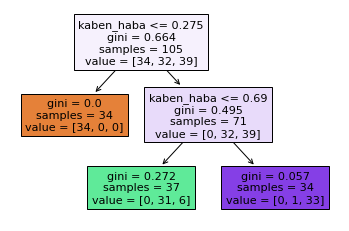

In [34]:
x_train.columns = ['gaku_nagasa','gaku_haba','kaben_nagasa','kaben_haba']

from sklearn.tree import plot_tree

plot_tree(model, feature_names = x_train.columns, filled=True)


In [37]:
sm = pd.read_csv('ex2.csv')
sm

,x0,x1,x2,x3,target
0,-1.244674,1.452124,-1.184385,-0.839169,1
1,-1.662920,-0.375804,-0.956673,0.380114,0
2,-1.926513,NaN,-1.203904,-0.728801,1
3,-1.455014,-0.472972,0.500495,-0.809670,0
4,-1.255422,1.348182,0.827424,-0.334090,1
...,...,...,...,...,...
95,-0.988204,0.934396,0.131865,-0.158939,1
96,-2.057470,2.869821,-0.887651,-0.741163,1
97,-1.669722,2.168812,-0.018603,0.607099,1
98,-1.011851,0.973641,-0.474993,-0.509644,1


In [38]:
sm['target'].unique()

array([1, 0])

In [39]:
sm.isna().any(axis=0)

x0        False
x1         True
x2         True
x3        False
target    False
dtype: bool

In [43]:
median = df.median()
median

がく片長さ    0.405
がく片幅     0.420
花弁長さ     0.490
花弁幅      0.500
dtype: float64

In [48]:
sm1 = sm.fillna(sm.median())
sm1.isna().any(axis=0)

x0        False
x1        False
x2        False
x3        False
target    False
dtype: bool

In [52]:
x_col = ['x0','x1','x2','x3']
x = sm1[x_col]

t = sm1['target']

In [53]:
model = tree.DecisionTreeClassifier(max_depth = 3, random_state = 0)
x_train,x_test,y_train,y_test = train_test_split(x,t, test_size=0.2, random_state=0)


In [54]:
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.95

In [59]:
sample =[[1.56, 0.23, -1.1, -2.8]]
answer = model.predict(sample)
answer

array([1])